## Поиск дубликатов заявок в выгрузке

In [1]:
import pandas as pd
%matplotlib inline

### Загружаем данные

In [2]:
# разделителем столбцов в нашем файле является табуляция (символ \t)
channel1 = pd.read_csv( 'channel_1_data.txt', sep = '\t' )
channel1.head()

,tel,order,region,city,address
0,d76182a41a,dbd28-2a6,A,Сусуман,Кирова 10
1,d4d482c479,5f375-8c9,B,Якутск,Турку 3
2,113ab84955,b9ce9-caf,C,Пионерский,Лермонтовская 5
3,92bb06cf14,9bad8-af4,A,Владивосток,Красноармейская 7
4,41a27123c7,77c85-fd6,D,Донецк,Солнечный 8


In [3]:
channel2 = pd.read_csv( 'channel_2_data.txt', sep = '\t' )
channel2.head()

,tel,order
0,afb9d03f32,8db45-465
1,401547a015,8c245-07d
2,3b36ddc61f,4be87-3c2
3,3b36ddc61f,83cc2-028
4,3b36ddc61f,f1c0b-412


### Удаляем дубликаты строк

In [4]:
# удаляем дубликаты по номеру телефона 'tel', оставляем только первую строку среди дубликатов

channel1.drop_duplicates( subset = 'tel', keep = 'first', inplace = True )
channel2.drop_duplicates( subset = 'tel', keep = 'first', inplace = True )

### Считаем пересечение и смотрим что получилось

In [5]:
# ищем внутреннее пересечение наших данных по номеру телефона 'tel'
# для удобства столбцам с одинаковыми названиями подставляем обозначения _channel_1 и _channel_2

intersect = pd.merge( channel1, channel2, on = 'tel', how = 'inner', suffixes = ['_channel_1', '_channel_2'] )
intersect.head()

,tel,order_channel_1,region,city,address,order_channel_2
0,162a7ce84a,db20e-61f,G,Александровск-Сахалинский,Фрунзе 10,8a99a-ac3
1,07a80c6e93,45b53-96d,F,Сусуман,Комсомольская 8,8d53a-30b
2,420a28914c,440ab-b19,F,Ижевск,Краснознаменная 7,e1f39-6c5
3,377d5b9f96,98e14-0b8,A,Елань,Комсомольская 8,ddd2b-d1b
4,b5e31b2b4b,eeb96-01a,C,Донецк,Строителей 7,aae06-0d4


In [6]:
# посмотрим сколько дубликатов в итоге получилось
totalRows = len( intersect )

In [7]:
print( 'Всего дубликатов заявок {}'.format( totalRows ) )

Всего дубликатов заявок 3453


### Посмотрим в каких регионах больше всего дубликатов

In [8]:
# сформируем сводную таблицу
# в качестве столбцов возьмем регион и посчитаем количество строк

pivotTable = pd.pivot_table( intersect, index = 'region', aggfunc = 'count' )
pivotTable

,address,city,order_channel_1,order_channel_2,tel
region,,,,,
A,459,459,459,459,459
B,504,504,504,504,504
C,229,229,229,229,229
D,186,186,186,186,186
E,657,657,657,657,657
F,955,955,955,955,955
G,463,463,463,463,463


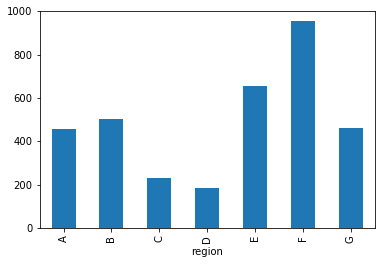

In [9]:
# нарисуем на диаграмме в каком регионе больше дубликатов

pivotTable['tel'].plot( kind = 'bar' )